In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import datetime
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots
from pickle import load,dump
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-whitegrid')
np.random.seed(0)
from datetime import datetime
from datetime import date
from datetime import time
import warnings
warnings.filterwarnings('ignore')
from pandas.tseries.frequencies import to_offset


In [2]:
def take_list_name_feature(df,name_feature): #name_feature: từ khóa trong bộ feature của tham số, VD: bức xạ có từ khóa là Irr
    name_columns = df.columns.tolist()
    namelist_columns_feature = []
    for name in name_columns:   
        if name_feature in name:
            namelist_columns_feature.append(name)
    return namelist_columns_feature

## PhuMy1 

In [3]:
def resample_df(df, resample_time, time_col='TimeStamp'):
    """
    resample_time: `minute`
    """
    resample_df = df.copy()
    if resample_time >= 30:
        resample_df = resample_df.set_index(
            resample_df[time_col] - to_offset(str(resample_time//2)+"min"))
    resample_df = resample_df.resample(str(resample_time)+'min', label='right').mean()
    return resample_df

In [4]:
locninh1 = pd.read_csv('./PM.csv')
locninh1['TimeStamp'] = pd.to_datetime(locninh1['TimeStamp'])  

In [5]:
locninh1

,TimeStamp,TotW_1,I_GHI_1,T_1,TotW_2,I_GHI_2,T_2,TotW_3,I_GHI_3,T_3
0,2022-09-01 00:00:00,0.0,0.0,25.25638,0.0,0.0,25.44552,0.0,NaN,25.25676
1,2022-09-01 00:05:00,0.0,0.0,25.23661,0.0,0.0,25.43309,0.0,NaN,25.24522
2,2022-09-01 00:10:00,0.0,0.0,25.21685,0.0,0.0,25.42067,0.0,NaN,25.23369
3,2022-09-01 00:15:00,0.0,0.0,25.19709,0.0,0.0,25.40824,0.0,NaN,25.22216
4,2022-09-01 00:20:00,0.0,0.0,25.17733,0.0,0.0,25.39582,0.0,NaN,25.21062
...,...,...,...,...,...,...,...,...,...,...
17554,2022-10-31 22:40:00,0.0,0.0,23.52364,0.0,0.0,23.48669,0.0,NaN,23.63308
17555,2022-10-31 22:45:00,0.0,0.0,23.49479,0.0,0.0,23.46018,0.0,NaN,23.58709
17556,2022-10-31 22:50:00,0.0,0.0,23.46593,0.0,0.0,23.43367,0.0,NaN,23.54110
17557,2022-10-31 22:55:00,0.0,0.0,23.43708,0.0,0.0,23.40715,0.0,NaN,23.49511


In [6]:
data_ln = locninh1.loc[locninh1['TimeStamp'].dt.date>=date(year=2022,month=10,day=23)]
data_ln = data_ln.loc[data_ln['TimeStamp'].dt.date<=date(year=2022,month=10,day=25)]
data_ln = data_ln.set_index('TimeStamp')

In [7]:
data_ln = data_ln[['TotW_3','I_GHI_3']]

In [8]:
data_ln

,TotW_3,I_GHI_3
TimeStamp,,
2022-10-23 00:00:00,0.0,NaN
2022-10-23 00:05:00,0.0,NaN
2022-10-23 00:10:00,0.0,NaN
2022-10-23 00:15:00,0.0,NaN
2022-10-23 00:20:00,0.0,NaN
...,...,...
2022-10-25 23:35:00,0.0,NaN
2022-10-25 23:40:00,0.0,NaN
2022-10-25 23:45:00,0.0,NaN


In [9]:
data_ln = resample_df(data_ln, resample_time = 15, time_col='TimeStamp')

In [10]:
data_ln

,TotW_3,I_GHI_3
TimeStamp,,
2022-10-23 00:15:00,0.0,NaN
2022-10-23 00:30:00,0.0,NaN
2022-10-23 00:45:00,0.0,NaN
2022-10-23 01:00:00,0.0,NaN
2022-10-23 01:15:00,0.0,NaN
...,...,...
2022-10-25 23:00:00,0.0,NaN
2022-10-25 23:15:00,0.0,NaN
2022-10-25 23:30:00,0.0,NaN


<AxesSubplot:xlabel='TimeStamp'>

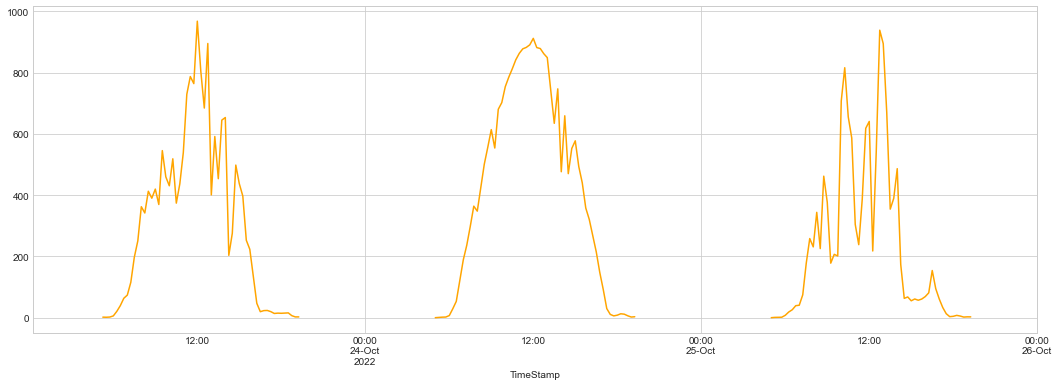

In [11]:
data_ln['I_GHI_3'].plot(figsize = (18,6), color = 'orange')

<AxesSubplot:xlabel='TimeStamp'>

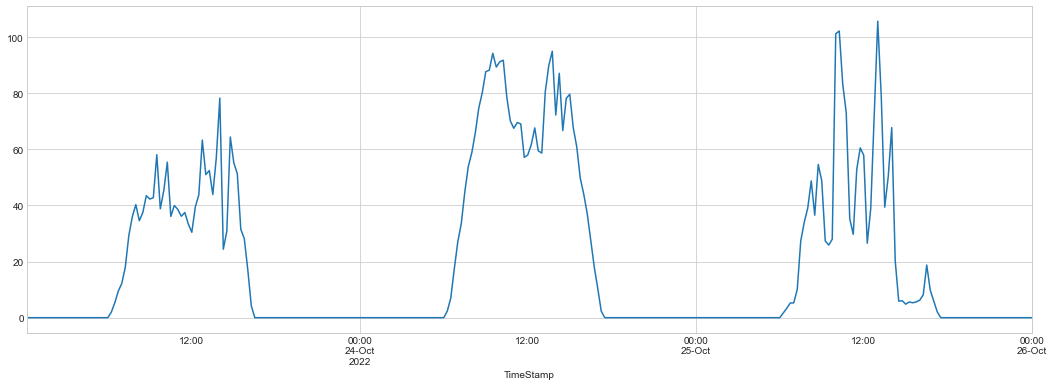

In [12]:
data_ln['TotW_3'].plot(figsize = (18,6))

## Weather forecast


In [13]:
# weather = pd.read_csv('./weather_LN.csv')

In [14]:
# weather

In [15]:
# weather = weather.set_index('period_end')

In [16]:
# weather = weather.reset_index()

In [17]:
# weather

In [18]:
# weather['period_end'] = pd.to_datetime(weather['period_end']) 

In [19]:
# weather

In [20]:
# data = weather.loc[weather['period_end'].dt.date>=date(year=2022,month=10,day=31)]
# data = data.loc[data['period_end'].dt.date<=date(year=2022,month=10,day=31)]
# data = data.set_index('period_end')

In [21]:
# data= resample_df(data, resample_time = 15, time_col='period_end')

In [22]:
# data['ghi'].plot(figsize = (18,6), color = 'green')

In [23]:
# from dateutil import tz
# import pytz
# dt_str  = "10/21/2021 8:18:19"
# format  = "%m/%d/%Y %H:%M:%S"
# # Create datetime object in local timezone
# dt_utc = datetime.strptime(dt_str, format)
# dt_utc = dt_utc.replace(tzinfo=pytz.UTC)
# print('Datetime in UTC Time zone: ', dt_utc)
# # Get local timezone
# local_zone = tz.tzlocal()
# # Convert timezone of datetime from UTC to local
# dt_local = dt_utc.astimezone(local_zone)

## MAPE 

In [24]:
# mape = pd.read_csv('./MAPE/LN3_2D.csv')

In [25]:
# mape['time'] = pd.to_datetime(mape['time']) 

In [26]:
# data_1 = mape.loc[mape['time'].dt.date>=date(year=2022,month=10,day=23)]
# data_1  = data_1 .loc[data_1 ['time'].dt.date<=date(year=2022,month=10,day=25)]
# data_1  = data_1 .set_index('time')

In [27]:
# data_1 = data_1['mape_erav']

In [28]:
# data_2 = data_1.reset_index()

In [29]:
# data_2['mape_erav'].max()

25.10415274

In [30]:
# data_2[data_2['mape_erav'] > 15]

,time,mape_erav
0,2022-10-23 08:00:00,21.871554
1,2022-10-23 14:00:00,18.041889
4,2022-10-25 08:00:00,21.473327
5,2022-10-25 14:00:00,25.104153


<AxesSubplot:xlabel='time'>

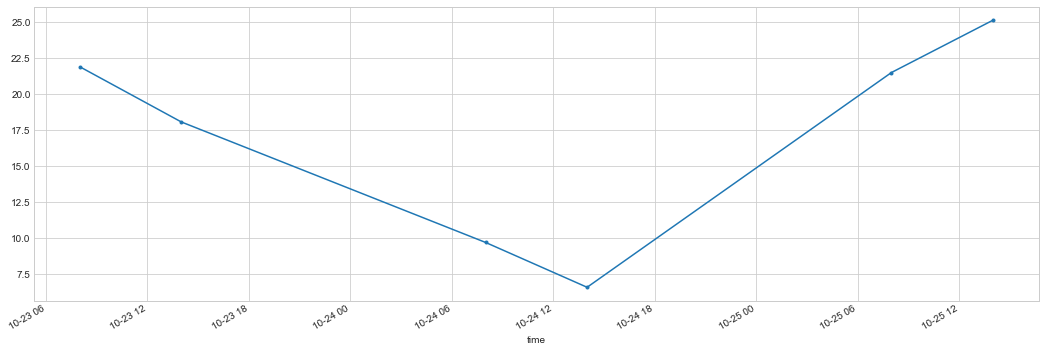

In [31]:
# data_1.plot(figsize = (18,6),marker='.')